In [1]:
import pandas as pd
import numpy as np

## Loading Dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')  

In [3]:
print(df.shape)
df.head()

(1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Checking for Null values 

In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
messages=df.copy()

In [6]:
messages.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## Cleaning Data

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [8]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus[5]

'get angri want damn pho'

## Preprocessing Data Using TF IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf_v=TfidfVectorizer(max_features=1500,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [27]:
import pickle

pickle.dump(tfidf_v, open('transform.pkl','wb'))

In [12]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [13]:
X.shape

(1000, 1500)

In [14]:
y=messages['Liked']

##  Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [17]:
count_df.head()

,absolut,absolut amaz,acknowledg,actual,ad,ago,airport,airport experi,airport experi tasti,almost,...,wrap,wrong,year,year ago,yellowtail carpaccio melt,yet,yum,yummi,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44589,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


## Training Model

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

### Multinomial Classifier with Hyperparameter Tuning

In [19]:
classifier=MultinomialNB(alpha=0.1)

In [20]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.744
Alpha: 0.1, Score : 0.784
Alpha: 0.2, Score : 0.788
Alpha: 0.30000000000000004, Score : 0.78
Alpha: 0.4, Score : 0.78
Alpha: 0.5, Score : 0.776
Alpha: 0.6000000000000001, Score : 0.776
Alpha: 0.7000000000000001, Score : 0.776
Alpha: 0.8, Score : 0.772
Alpha: 0.9, Score : 0.772


C:\Users\yogender\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Multinomial Classifier with Updaated Parameter

In [21]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.788


## Classification Report

In [22]:
from sklearn.metrics import classification_report

model_score= (classification_report(y_test, pred))
print(model_score)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       117
           1       0.81      0.78      0.80       133

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



## Confusion Matrix

In [23]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
 
plot_confusion_matrix(classifier , X_test, y_test) 
plt.show()

<Figure size 640x480 with 2 Axes>

## AUC Score

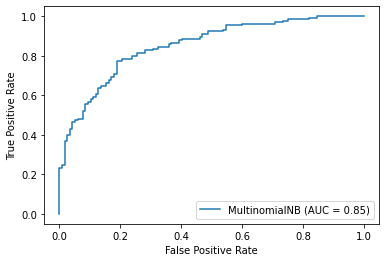

In [24]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(classifier,X_test, y_test);

In [25]:
pickle_out= open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()